In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
# Load dataset
df = pd.read_csv('marketing_data.csv').iloc[: , 1:]

In [4]:
# Rename Pandas columns to lower case
df.columns = df.columns.str.lower()

In [5]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [6]:
# Examine the data
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,1970,graduation,divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,sp
1,1961,graduation,single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,ca
2,1958,graduation,married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,us
3,1967,graduation,together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,aus
4,1989,graduation,single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,sp


In [7]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year_birth           2240 non-null   int64 
 1   education            2240 non-null   object
 2   marital_status       2240 non-null   object
 3    income              2216 non-null   object
 4   kidhome              2240 non-null   int64 
 5   teenhome             2240 non-null   int64 
 6   dt_customer          2240 non-null   object
 7   recency              2240 non-null   int64 
 8   mntwines             2240 non-null   int64 
 9   mntfruits            2240 non-null   int64 
 10  mntmeatproducts      2240 non-null   int64 
 11  mntfishproducts      2240 non-null   int64 
 12  mntsweetproducts     2240 non-null   int64 
 13  mntgoldprods         2240 non-null   int64 
 14  numdealspurchases    2240 non-null   int64 
 15  numwebpurchases      2240 non-null   int64 
 16  numcat

Preprocess the data

In [8]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [9]:
# Transform income column to a numerical
df['income'] = df['income'].str.replace(',','').str.replace('$','').astype('float')

C:\Users\malch\AppData\Local\Temp\ipykernel_9596\242133364.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace(',','').str.replace('$','').astype('float')


In [10]:
import datetime 

In [11]:
current_year = datetime.date.today().year
current_year

2023

In [12]:
# Replace 'year_birth' with 'age'
df['age'] = current_year - df['year_birth']

In [13]:
# Modify date of enrollment (принятие на работу) to total number of months since enrollment
df['enrollment_month'] = (pd.to_datetime('now') - pd.to_datetime(df['dt_customer'])) // np.timedelta64(1,'M')  

C:\Users\malch\AppData\Local\Temp\ipykernel_9596\693178223.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['enrollment_month'] = (pd.to_datetime('now') - pd.to_datetime(df['dt_customer'])) // np.timedelta64(1,'M')


In [14]:
# Rename the column 'response'
df = df.rename(columns = {'response': 'acceptedcmp6'})

In [15]:
# Drop unnecessary columns
df = df.drop(['year_birth', 'dt_customer'], axis = 1)

In [16]:
df.describe()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,acceptedcmp6,complain,age,enrollment_month
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,54.194196,117.316071
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,11.984069,6.642408
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,106.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,112.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,117.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,123.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,129.000000


In [17]:
!pip install gitly -U

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from gitly.colab.plot import GitlyPlotter

This script was made to run only on Google Colab notebooks, other environments was not tested completely
You are not in Colab envirement, make sure you already have Plotly > 4.9.0 and kaleido


In [19]:
gitly = GitlyPlotter('github')

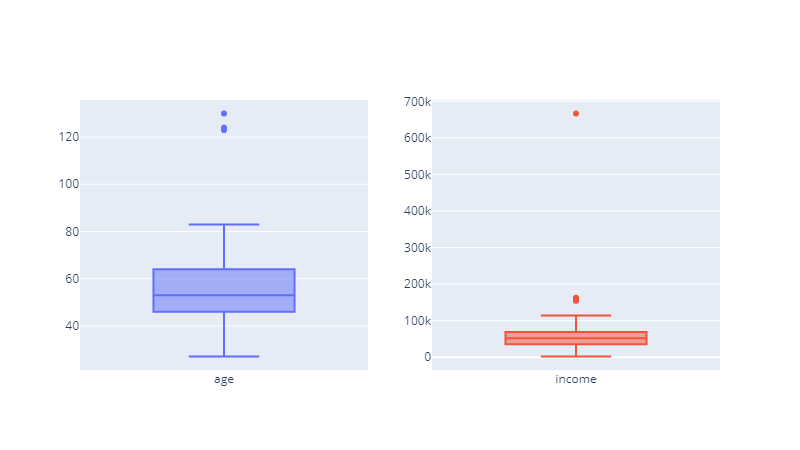

In [20]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Box(y = df['age'], name = 'age'), row = 1, col = 1)
fig.add_trace(go.Box(y = df['income'], name = 'income'), row = 1, col = 2)

fig.update_layout(showlegend = False)

gitly.show(fig)

In [21]:
# Find outliers
outliers_age = df[df['age'] > 100].index

# Remove outliers
df.drop(outliers_age, inplace = True)

In [22]:
# Find outlier
outliers_income = df[df['income'] > 200000].index

# Remove outlier
df.drop(outliers_income, inplace = True)

In [23]:
df['education'].value_counts()

graduation    1126
phd            485
master         370
2n cycle       201
basic           54
Name: education, dtype: int64

In [24]:
# Replace '2n cycle' with 'master'
df['education'] = df['education'].apply(lambda x: 'master' if str(x) == '2n cycle' else str(x))

In [25]:
# Replace 'graduation' with 'undergraduate'
df['education'] = df['education'].apply(lambda x: 'undergraduate' if str(x) == 'graduation' else str(x))

In [26]:
df['marital_status'].value_counts()

married     864
together    578
single      479
divorced    231
widow        77
alone         3
yolo          2
absurd        2
Name: marital_status, dtype: int64

In [27]:
# Merge 'yolo', 'absurd', and 'alone' under 'single'
df['marital_status'] = df['marital_status'].apply(lambda x: 'single' if str(x) in ['alone', 'yolo', 'absurd'] else str(x))

In [28]:
df['country'].value_counts()

sp     1094
sa      335
ca      268
aus     160
ind     147
ger     120
us      109
me        3
Name: country, dtype: int64

Check for missing values

In [29]:
df.isnull().sum()

education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
acceptedcmp6            0
complain                0
country                 0
age                     0
enrollment_month        0
dtype: int64

In [30]:
X = df.drop('numstorepurchases', axis = 1)

In [31]:
y = df['numstorepurchases']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [35]:
transformer = ColumnTransformer(transformers = [('simple_imputer', SimpleImputer(strategy = 'median'), ['income'])], remainder = 'passthrough')

In [36]:
#Examine collinearity
X_tr = transformer.fit_transform(X_train)
X_tr = pd.DataFrame(data = X_tr, columns = X.columns)


In [37]:
!pip install dython

In [38]:
!pip install psutil>=5.9.1

In [39]:
from dython.nominal import associations

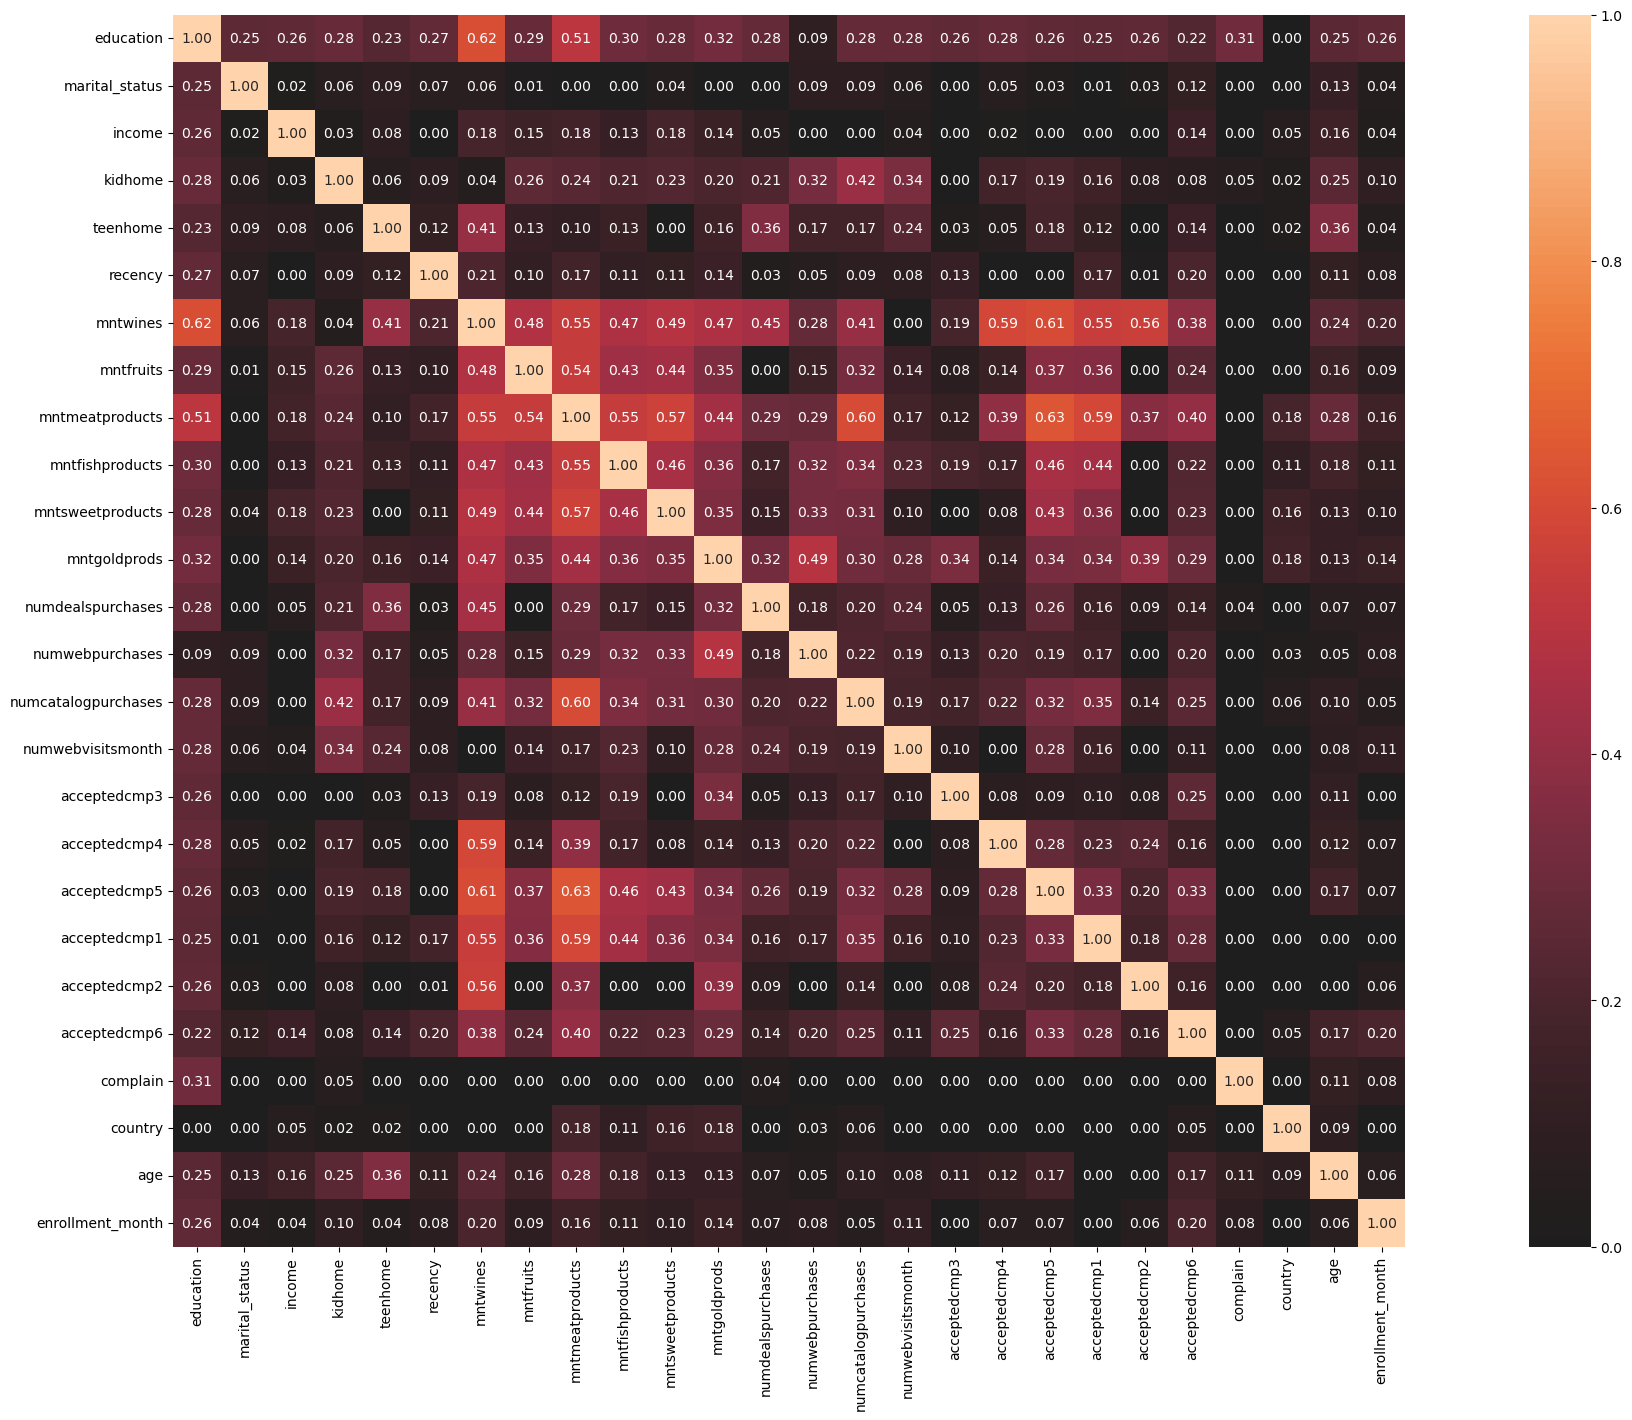

In [40]:
complete_correlation = associations(X_tr, figsize = (32, 16))

In [41]:
!pip install catboost

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor

In [43]:
numeric_columns = list(X_train.select_dtypes(exclude = ['object']).columns.values.tolist())
categorical_columns = list(X_train.select_dtypes(include = ['object']).columns.values.tolist())
numeric_transformer = Pipeline(steps = [('simple_imputer', SimpleImputer(strategy = 'median'))])
categorical_transformer = Pipeline(steps = [('one_hot_encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, numeric_columns),
                                                 ('categorical', categorical_transformer, categorical_columns)], remainder = 'passthrough')

bundled_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                     ('scaler', RobustScaler()),
                                     ('model', CatBoostRegressor(silent = True, random_state = 42))])

In [44]:
bundled_pipeline.fit(X_train, y_train)

C:\Users\malch\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['income', 'kidhome',
                                                   'teenhome', 'recency',
                                                   'mntwines', 'mntfruits',
                                                   'mntmeatproducts',
                                                   'mntfishproducts',
                                                   'mntsweetproducts',
                                                   'mntgoldprods',
                                                   'numdealspurchases',
                                                   'numwebpurchases',
                                                   'numcatal...
                                                   'acceptedcmp4',
                                                   'acceptedcmp5',
                                                   'acceptedcmp1',
                                                   'acceptedcmp2',
                                                   'acceptedcmp6', 'complain',
                                                   'age', 'enrollment_month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['education',
                                                   'marital_status',
                                                   'country'])])),
                ('scaler', RobustScaler()),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000002BEBD44DFC0>)])

In [45]:
y_pred = bundled_pipeline.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
mean_absolute_error(y_test, y_pred)

1.1308703491228713

In [48]:
#ELI5
one_hot_columns = list(bundled_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['one_hot_encoder'].get_feature_names_out())

In [49]:
numeric_features_list = list(numeric_columns)
numeric_features_list.extend(one_hot_columns)

In [50]:
!pip install eli5

In [51]:
import eli5

In [52]:
eli5.explain_weights(bundled_pipeline.named_steps['model'], top = 50, feature_names = numeric_features_list)

Weight,Feature
0.2222,mntwines
0.1164,mntmeatproducts
0.0718,numcatalogpurchases
0.0698,income
0.0584,mntsweetproducts
0.0574,mntfruits
0.0563,mntfishproducts
0.0459,numwebpurchases
0.0425,numwebvisitsmonth
0.0392,mntgoldprods


In [53]:
#С точки зрения общего объема покупок дела в США значительно лучше, чем в остальном мире?
totalpurchases = df[['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'country']]

In [54]:
# Calculate the total number of purchases made through different channels
totalpurchases['totalpurchases'] = totalpurchases['numdealspurchases'] + totalpurchases['numwebpurchases'] + totalpurchases['numcatalogpurchases'] + totalpurchases['numstorepurchases']

In [55]:
average_purchases_per_country = totalpurchases.groupby('country').agg(total_purchases = ('totalpurchases', 'sum'))

In [56]:
average_purchases_per_country['total_customers'] = totalpurchases['country'].value_counts()

In [57]:
average_purchases_per_country['purchases_per_customer'] = np.floor(average_purchases_per_country['total_purchases'] / average_purchases_per_country['total_customers'])

In [58]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('country'))

,total_purchases,total_customers,purchases_per_customer,country
country,,,,
aus,2314,160,14.0,aus
ca,4101,268,15.0,ca
ger,1788,120,14.0,ger
ind,2093,147,14.0,ind
me,59,3,19.0,me
sa,5102,335,15.0,sa
sp,16037,1094,14.0,sp
us,1761,109,16.0,us


In [59]:
average_purchases_per_country.reset_index(inplace = True)

In [60]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'total_purchases', ascending = False)

In [61]:
import plotly.graph_objects as go

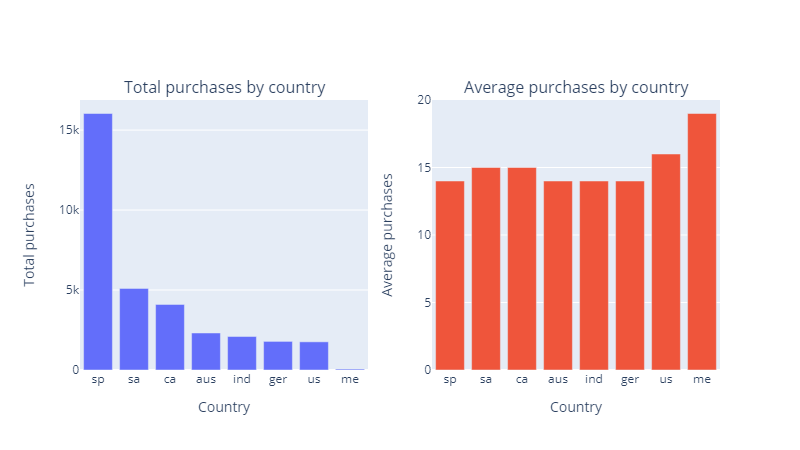

In [62]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Total purchases by country', 'Average purchases by country'))

fig.add_trace(go.Bar(x = average_purchases_per_country['country'], y = average_purchases_per_country['total_purchases']), row = 1, col = 1)
fig.add_trace(go.Bar(x = average_purchases_per_country['country'], y = average_purchases_per_country['purchases_per_customer']), row = 1, col = 2)

fig['layout']['xaxis']['title'] = 'Country'
fig['layout']['xaxis2']['title'] = 'Country'
fig['layout']['yaxis']['title'] = 'Total purchases'
fig['layout']['yaxis2']['title'] = 'Average purchases'

fig.update_layout(showlegend = False)

gitly.show(fig)

In [63]:
#Есть ли существенная связь между географическим регионом и успехом кампании?
from scipy.stats import chi2_contingency

In [64]:
acceptedcmp1 = pd.crosstab(df['country'], df['acceptedcmp1'])

In [65]:
c, p, dof, expected = chi2_contingency(acceptedcmp1)

In [66]:
p

0.8736949588868972

In [67]:
acceptedcmp2 = pd.crosstab(df['country'], df['acceptedcmp2'])

In [68]:
c, p, dof, expected = chi2_contingency(acceptedcmp2)

In [69]:
p

0.5870888995252126

In [70]:
acceptedcmp3 = pd.crosstab(df['country'], df['acceptedcmp3'])

In [71]:
c, p, dof, expected = chi2_contingency(acceptedcmp3)

In [72]:
p

0.6385182178116886

In [73]:
acceptedcmp4 = pd.crosstab(df['country'], df['acceptedcmp4'])

In [74]:
c, p, dof, expected = chi2_contingency(acceptedcmp4)

In [75]:
p

0.4081803337237639

In [76]:
acceptedcmp5 = pd.crosstab(df['country'], df['acceptedcmp5'])
c, p, dof, expected = chi2_contingency(acceptedcmp5)
p
acceptedcmp6 = pd.crosstab(df['country'], df['acceptedcmp6'])
c, p, dof, expected = chi2_contingency(acceptedcmp6)

In [77]:
p

0.07613726068845521

In [78]:
acceptedcmp_by_country = df.groupby('country').agg(acceptedcmp1 = ('acceptedcmp1', 'mean'), 
                                                   acceptedcmp2 = ('acceptedcmp2', 'mean'),
                                                   acceptedcmp3 = ('acceptedcmp3', 'mean'),
                                                   acceptedcmp4 = ('acceptedcmp4', 'mean'),
                                                   acceptedcmp5 = ('acceptedcmp5', 'mean'),
                                                   acceptedcmp6 = ('acceptedcmp6', 'mean')).reset_index()

In [79]:
acceptedcmp_by_country

,country,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp6
0,aus,0.043750,0.000000,0.056250,0.037500,0.081250,0.143750
1,ca,0.067164,0.022388,0.067164,0.089552,0.078358,0.141791
2,ger,0.058333,0.016667,0.083333,0.091667,0.066667,0.141667
3,ind,0.047619,0.013605,0.088435,0.074830,0.040816,0.088435
4,me,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667
5,sa,0.059701,0.011940,0.062687,0.059701,0.062687,0.155224
6,sp,0.071298,0.014625,0.075868,0.081353,0.080439,0.160878
7,us,0.064220,0.000000,0.073394,0.055046,0.045872,0.119266


In [80]:
acceptedcmp_by_country = pd.melt(acceptedcmp_by_country.reset_index(), id_vars = 'country', value_vars = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp6'])

In [81]:
import plotly.express as px

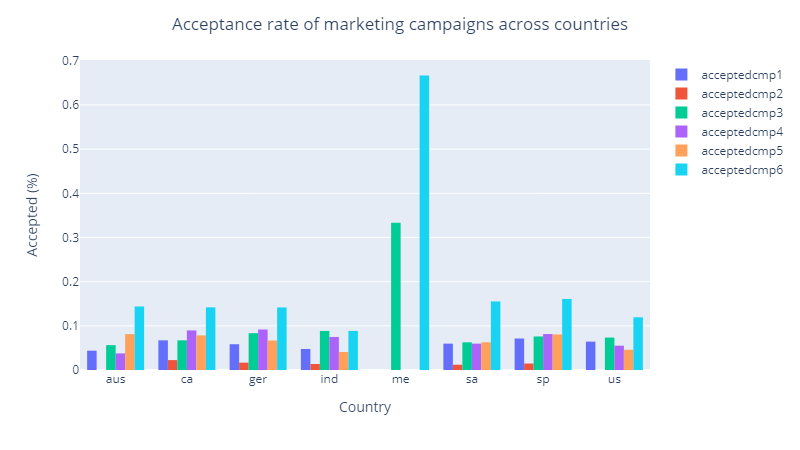

In [82]:
fig = px.histogram(acceptedcmp_by_country, x = 'country', y = 'value', color = 'variable', barmode = 'group')

fig.update_layout(title_text = 'Acceptance rate of marketing campaigns across countries', title_x = 0.5)

fig.update_layout(xaxis_title = 'Country')
fig.update_layout(yaxis_title = 'Accepted (%)')

fig.update_layout(legend = {'title_text': ''})

gitly.show(fig)

In [83]:
accepted_cmp = pd.DataFrame(df[['acceptedcmp1', 
                                'acceptedcmp2', 
                                'acceptedcmp3', 
                                'acceptedcmp4', 
                                'acceptedcmp5', 
                                'acceptedcmp6']].mean() * 100, columns = ['accepted_(%)']).sort_values(by = 'accepted_(%)', ascending = False).reset_index()

In [84]:
#1. Какая маркетинговая кампания наиболее успешна?
accepted_cmp.reset_index(inplace = True)
accepted_cmp = accepted_cmp.rename(columns = {'index': 'marketing_campaign', 'level_0': 'index'})
accepted_cmp.set_index('index', inplace = True)

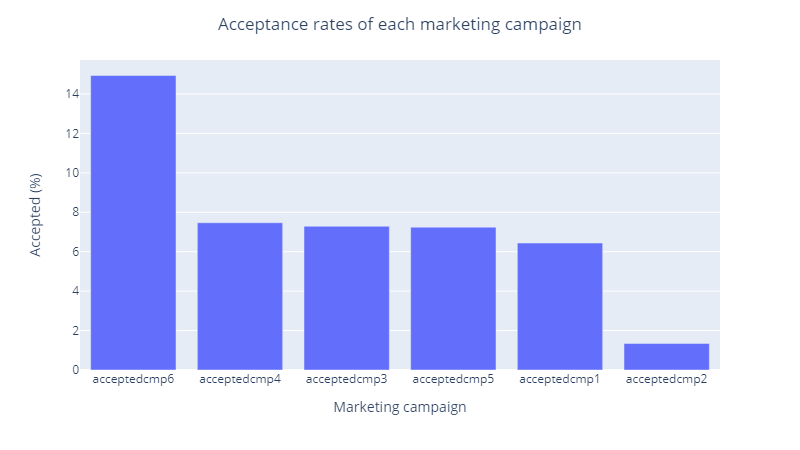

In [85]:
fig = px.bar(accepted_cmp, x = 'marketing_campaign', y = 'accepted_(%)')

fig.update_layout(title_text = 'Acceptance rates of each marketing campaign', title_x = 0.5)

fig.update_layout(xaxis_title = 'Marketing campaign')
fig.update_layout(yaxis_title = 'Accepted (%)')

gitly.show(fig)

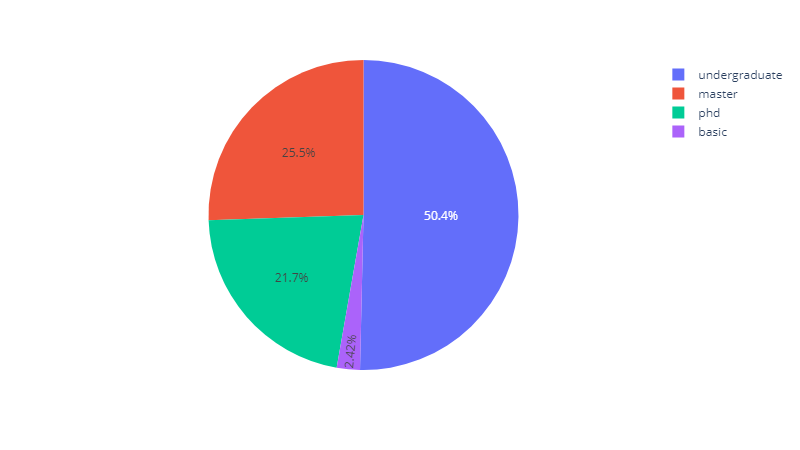

In [86]:
#2. Как выглядит средний клиент этой компании?
education = df.groupby('education').agg(count = ('education', 'count'))
education.assign(education = education.index.get_level_values('education'))
education.reset_index(inplace = True)
fig = px.pie(education, values = 'count', names = 'education')

gitly.show(fig)

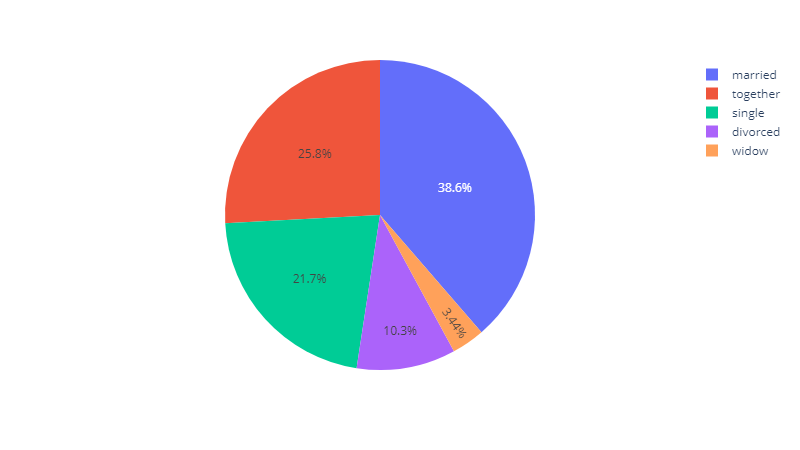

In [87]:
marital_status = df.groupby('marital_status').agg(count = ('marital_status', 'count'))
marital_status.assign(marital_status = marital_status.index.get_level_values('marital_status'))
marital_status.reset_index(inplace = True)
fig = px.pie(marital_status, values = 'count', names = 'marital_status')

gitly.show(fig)

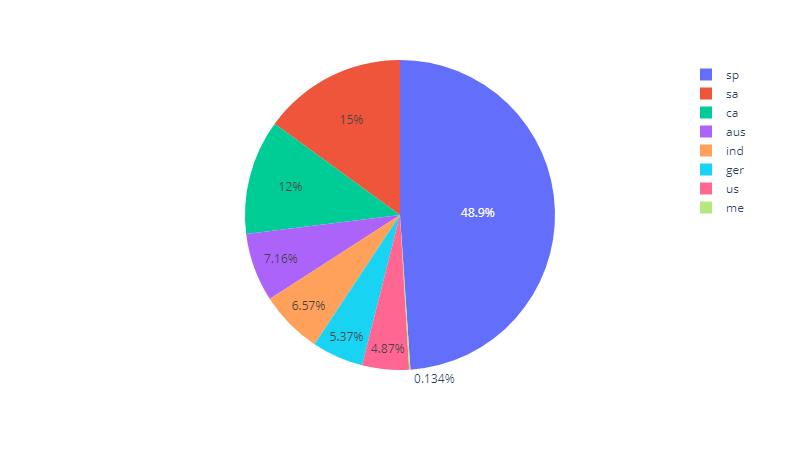

In [88]:
country = df.groupby('country').agg(count = ('country', 'count'))
country.assign(country = country.index.get_level_values('country'))
country.reset_index(inplace = True)
fig = px.pie(country, values = 'count', names = 'country')

gitly.show(fig)

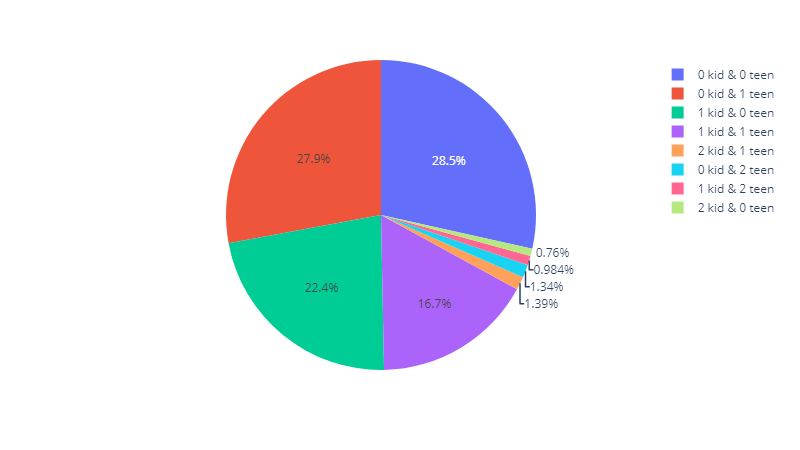

In [89]:
dependents = df[['kidhome', 'teenhome']].value_counts().reset_index()
dependents['index'] = np.arange(1, dependents.shape[0] + 1)
dependents = dependents.set_index('index')
dependents['kidhome'] = dependents['kidhome'].astype('string') + 'kid' 
dependents['kidhome'] = dependents['kidhome'].replace(to_replace = r'(kid)', value = r' \1', regex = True)
dependents['teenhome'] = dependents['teenhome'].astype('string') + 'teen' 
dependents['teenhome'] = dependents['teenhome'].replace(to_replace = r'(teen)', value = r' \1', regex = True)
dependents['dependenthome'] = dependents['kidhome']  + ' & ' + dependents['teenhome']
dependents = dependents.rename(columns = {0: 'count'})
fig = px.pie(dependents, values = 'count', names = 'dependenthome')

gitly.show(fig)

In [90]:
numerical_features = pd.DataFrame((df[['age', 'income']].mean()))
numerical_features = numerical_features.rename(columns = {0: 'numerical_feature'})
numerical_features

,numerical_feature
age,54.101968
income,51958.810579


Средний покупатель...

54 года
из Испании
высшее образование
зарабатывает около 52 000 долларов США
состоит в отношениях, т.е. состоит в браке или вместе
имеет по крайней мере ребенка (ребенка или подростка)